***Neccassairy Librairies***

In [2]:
pip install brewer2mpl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from brewer2mpl import qualitative

In [4]:
#import the data:
Video=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [6]:
Video.shape

(16719, 16)

In [7]:
Video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


***Data Preprocessing***

In [9]:
#null values:
Video.isnull().any().any()

True

In [10]:
#let's drop them:
Video = Video.dropna(axis=0)

In [11]:
#unique values:
Video.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [14]:
# Dataframe contain info only on the 7th Gen consoles
video7th = Video[(Video['Platform'] == 'Wii') | (Video['Platform'] == 'PS3') | (Video['Platform'] == 'X360')]
video7th.shape

(2106, 16)

***the Visualisation using Bart Chart***

Text(0, 0.5, 'Global Sales')

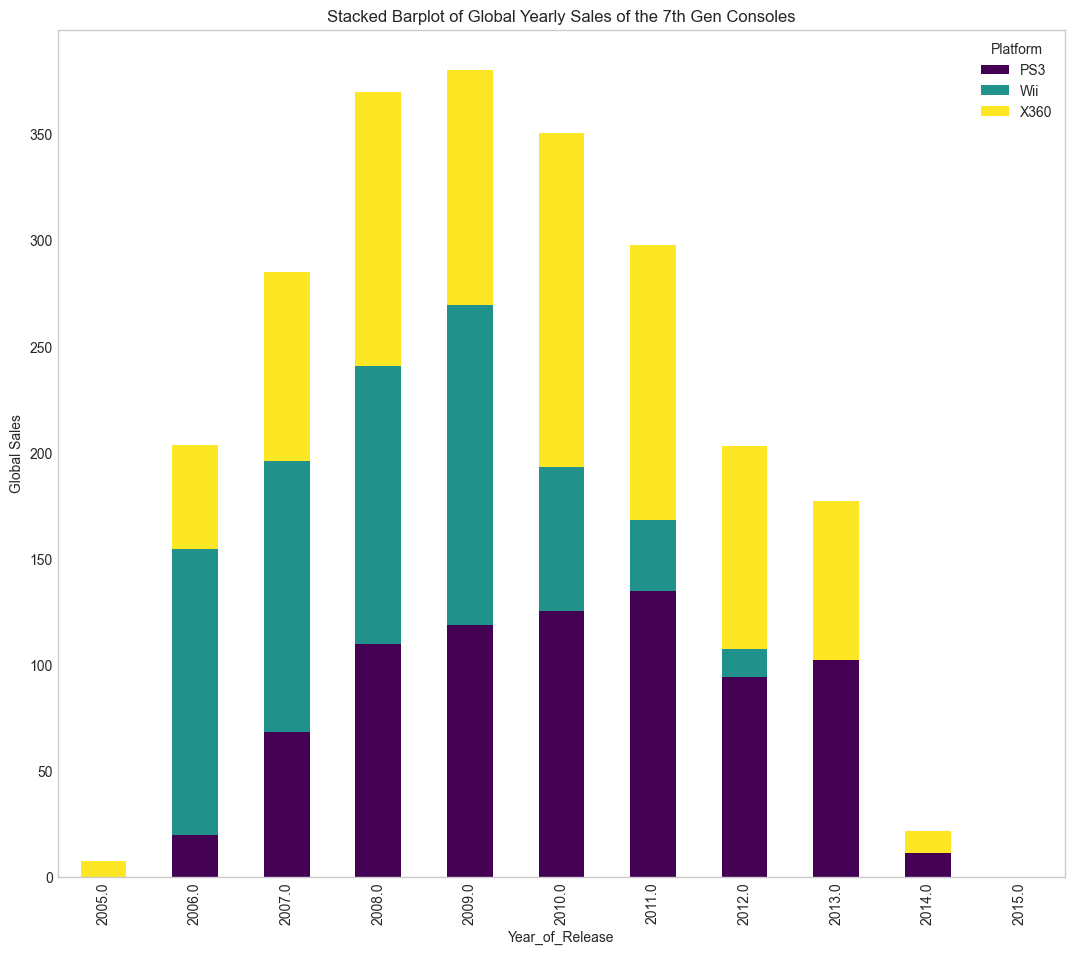

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'viridis',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Sales')

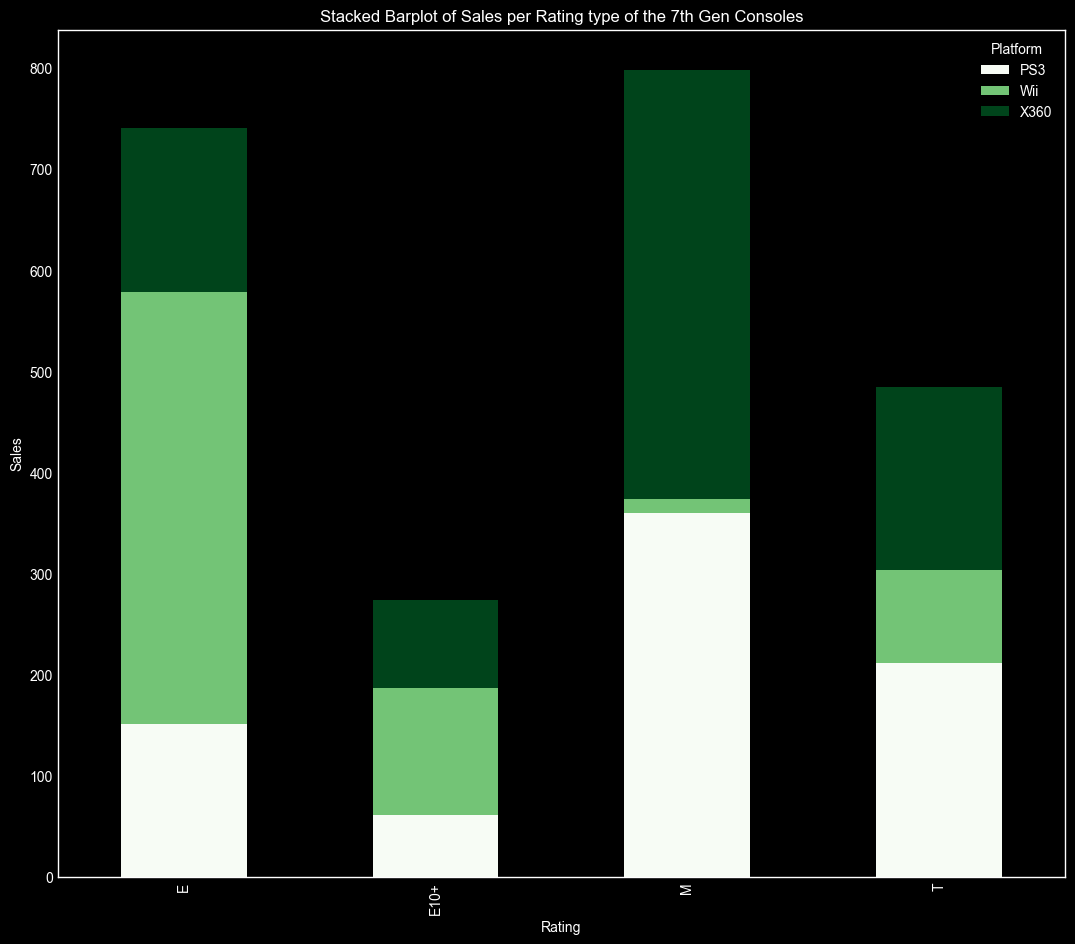

In [20]:
plt.style.use('dark_background')
ratingSales = video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', 
                           grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

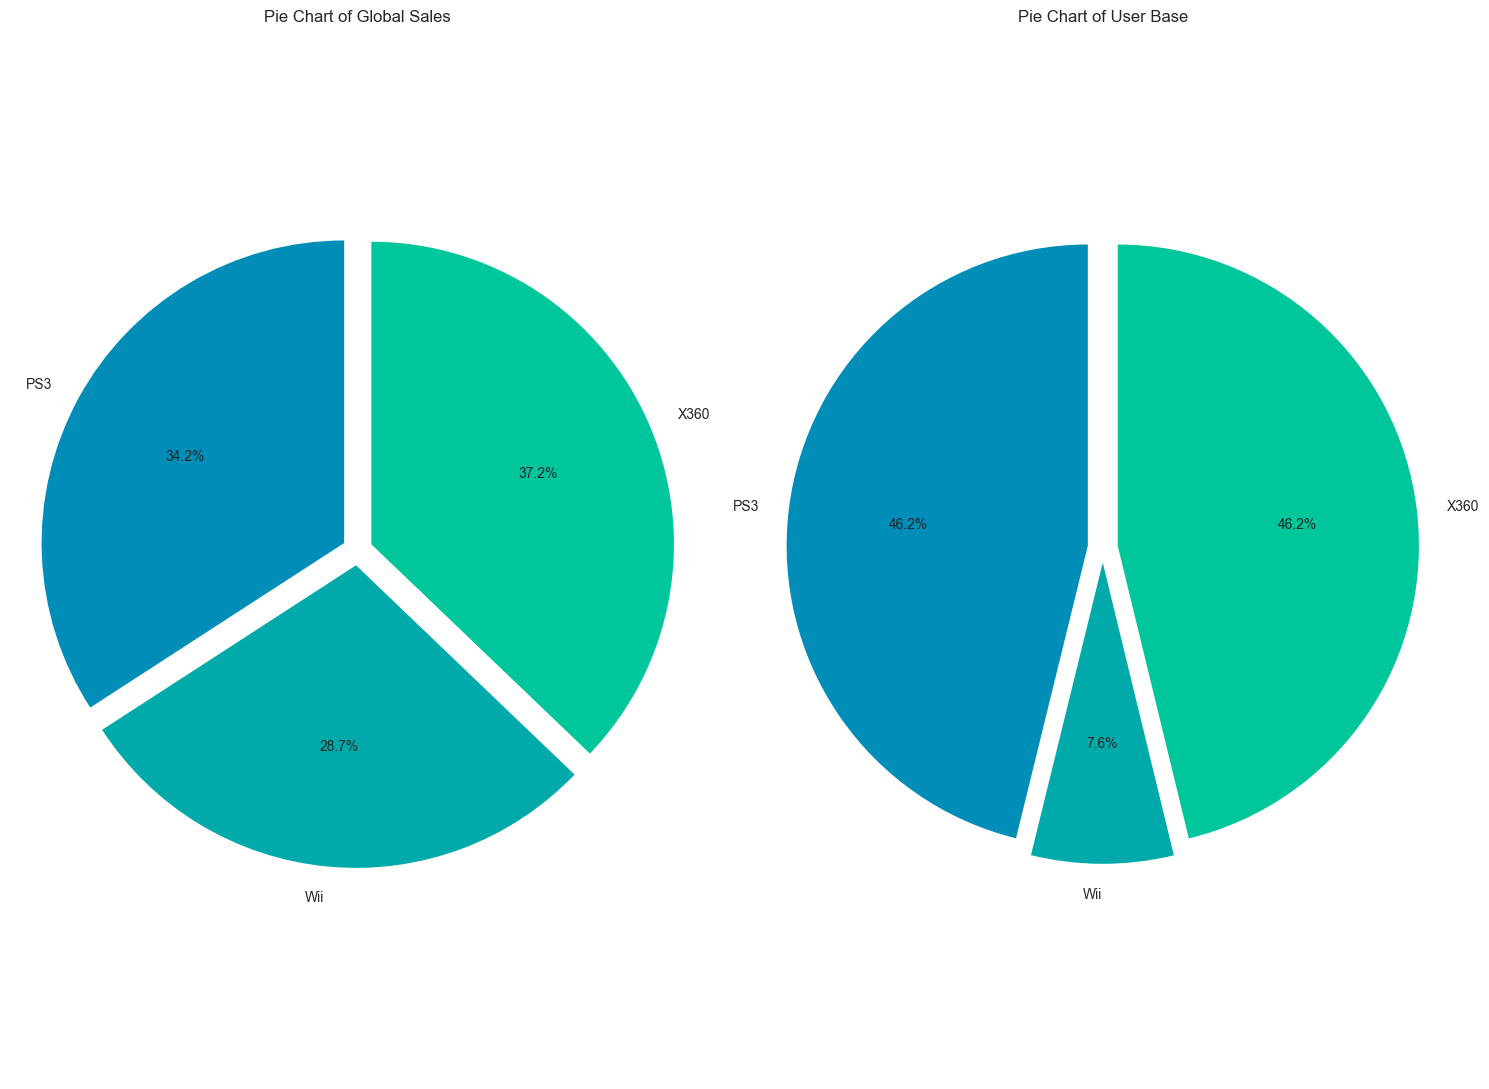

In [22]:
# Plotting our pie charts
# Create a list of colors 
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()